DATI SANITARI SINTETICI PER PROTEZIONE INFORMATICA
Fase 1: Preparazione Dataset UCI Diabetes

[1/5] Caricamento dataset...
Dataset caricato: fonte alternativa
[2/5] Preprocessing...
[3/5] Generazione statistiche...

STATISTICHE DESCRITTIVE

Dimensioni: 768 osservazioni × 9 variabili

Distribuzione target:
  - Classe 0 (no diabete): 500 (65.1%)
  - Classe 1 (diabete):    268 (34.9%)

                   count    mean    std    min     25%     50%     75%  \
pregnancies        768.0    3.85   3.37   0.00    1.00    3.00    6.00   
glucose            768.0  121.66  30.44  44.00   99.75  117.00  140.25   
blood_pressure     768.0   72.39  12.10  24.00   64.00   72.00   80.00   
skin_thickness     768.0   29.11   8.79   7.00   25.00   29.00   32.00   
insulin            768.0  140.67  86.38  14.00  121.50  125.00  127.25   
bmi                768.0   32.46   6.88  18.20   27.50   32.30   36.60   
diabetes_pedigree  768.0    0.47   0.33   0.08    0.24    0.37    0.63   
age                768

/tmp/ipython-input-2061624441.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


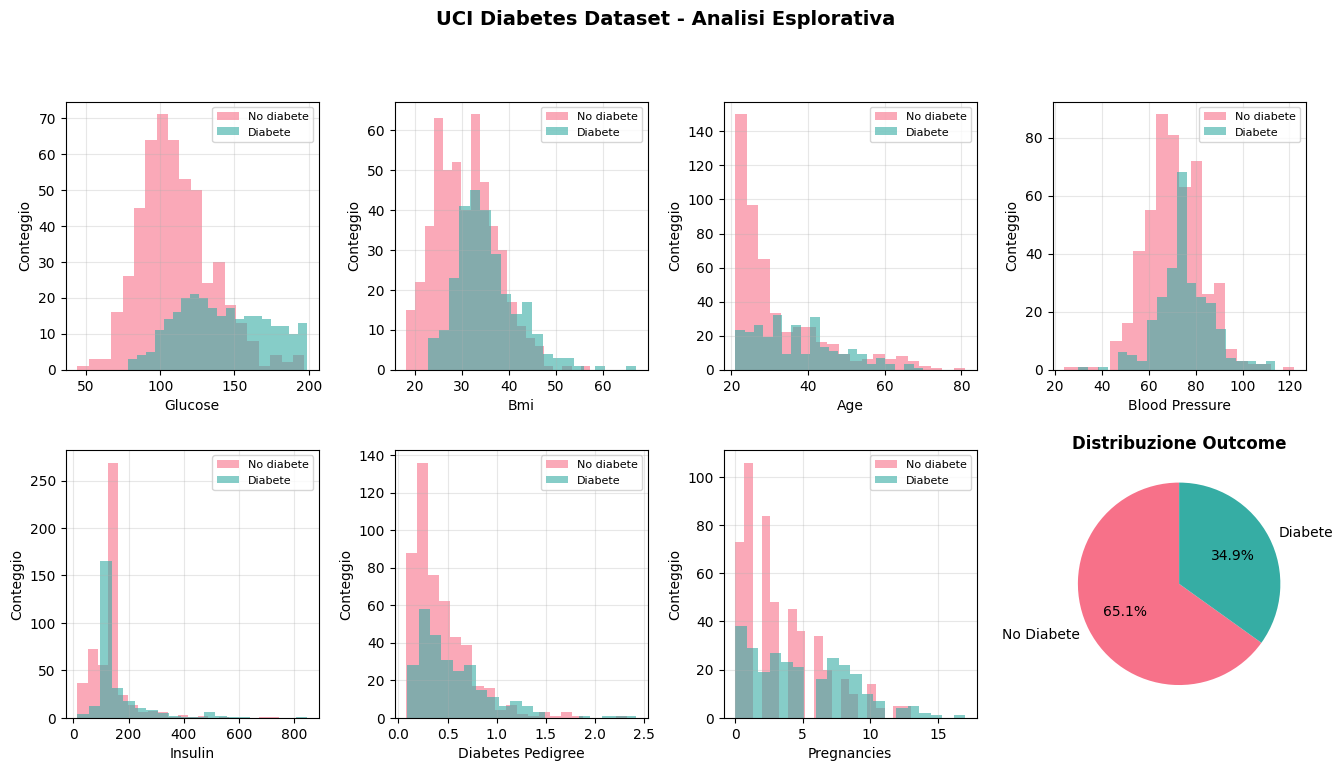


✓ Visualizzazione salvata: diabetes_analysis.png

SALVATAGGIO COMPLETATO
File: diabetes_dataset.csv
Dimensioni: 768 righe × 9 colonne
Memoria: 54.1 KB

PROCESSO COMPLETATO
Dataset disponibile: diabetes_dataset.csv
Caricamento: df = pd.read_csv('diabetes_dataset.csv')


In [ ]:
# ============================================================================
# PROGETTO: Dati Sanitari Sintetici per Protezione Informatica
# PARTE 1: Caricamento e Preparazione Dataset UCI Diabetes
# ============================================================================

!pip install -q ucimlrepo pandas numpy matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ============================================================================
# 1. CARICAMENTO DATASET
# ============================================================================

def carica_dataset():
    """
    Carica il dataset UCI Diabetes da repository ufficiale.
    Fallback su fonte alternativa se necessario.
    """
    try:
        from ucimlrepo import fetch_ucirepo
        diabetes = fetch_ucirepo(id=34)
        X = diabetes.data.features
        y = diabetes.data.targets
        df = pd.concat([X, y], axis=1)
        df.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                      'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
        print("Dataset caricato: UCI ML Repository")

    except:
        url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
        df = pd.read_csv(url, header=None)
        df.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                     'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
        print("Dataset caricato: fonte alternativa")

    return df


# ============================================================================
# 2. PREPROCESSING
# ============================================================================

def preprocessa_dataset(df):
    """
    Gestisce valori mancanti (codificati come 0) sostituendoli con la mediana.
    """
    df_clean = df.copy()
    cols_missing = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']

    for col in cols_missing:
        df_clean[col] = df_clean[col].replace(0, np.nan)
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

    return df_clean


# ============================================================================
# 3. ANALISI E VISUALIZZAZIONE
# ============================================================================

def genera_tabella_statistica(df):
    """
    Genera tabella con statistiche descrittive del dataset.
    """
    stats = df.describe().T
    stats['missing'] = df.isnull().sum()
    stats = stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing']]

    print("\n" + "="*80)
    print("STATISTICHE DESCRITTIVE")
    print("="*80)
    print(f"\nDimensioni: {df.shape[0]} osservazioni × {df.shape[1]} variabili")
    print(f"\nDistribuzione target:")
    print(f"  - Classe 0 (no diabete): {(df['outcome']==0).sum()} ({(df['outcome']==0).sum()/len(df)*100:.1f}%)")
    print(f"  - Classe 1 (diabete):    {(df['outcome']==1).sum()} ({(df['outcome']==1).sum()/len(df)*100:.1f}%)")
    print(f"\n{stats.round(2)}")

    return stats


def visualizza_dataset(df):
    """
    Genera visualizzazioni esplorative del dataset.
    Utilizza conteggi assoluti per gli istogrammi.
    """
    fig = plt.figure(figsize=(16, 8))
    gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.3)

    # Colori
    color_palette = sns.color_palette("husl", 2)

    # 1. Distribuzioni univariate (istogrammi)
    features_plot = ['glucose', 'bmi', 'age', 'blood_pressure', 'insulin', 'diabetes_pedigree', 'pregnancies']
    for i, feature in enumerate(features_plot):
        ax = fig.add_subplot(gs[i//4, i%4])

        # Separa per classe e traccia conteggio assoluto
        df[df['outcome']==0][feature].hist(bins=20, alpha=0.6, color=color_palette[0],
                                            label='No diabete', ax=ax)
        df[df['outcome']==1][feature].hist(bins=20, alpha=0.6, color=color_palette[1],
                                            label='Diabete', ax=ax)

        ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
        ax.set_ylabel('Conteggio', fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(alpha=0.3)

    # 2. Distribuzione target (pie chart)
    ax = fig.add_subplot(gs[1, 3])
    outcome_counts = df['outcome'].value_counts()
    wedges, texts, autotexts = ax.pie(outcome_counts, labels=['No Diabete', 'Diabete'],
                                        autopct='%1.1f%%', colors=color_palette,
                                        startangle=90, textprops={'fontsize': 10})
    ax.set_title('Distribuzione Outcome', fontsize=12, fontweight='bold')

    plt.suptitle('UCI Diabetes Dataset - Analisi Esplorativa',
                 fontsize=14, fontweight='bold', y=0.995)

    plt.savefig('diabetes_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    print(f"\n✓ Visualizzazione salvata: diabetes_analysis.png")


def genera_tabella_campione(df, n=10):
    """
    Mostra tabella con campione casuale del dataset.
    """
    print("\n" + "="*80)
    print("CAMPIONE DATASET (prime 10 osservazioni)")
    print("="*80)
    print(df.head(n).to_string(index=True))


# ============================================================================
# 4. SALVATAGGIO
# ============================================================================

def salva_dataset(df, filename='diabetes_dataset.csv'):
    """
    Salva il dataset preprocessato in formato CSV.
    """
    df.to_csv(filename, index=False)
    file_size = df.memory_usage(deep=True).sum() / 1024

    print("\n" + "="*80)
    print("SALVATAGGIO COMPLETATO")
    print("="*80)
    print(f"File: {filename}")
    print(f"Dimensioni: {df.shape[0]} righe × {df.shape[1]} colonne")
    print(f"Memoria: {file_size:.1f} KB")

    return filename


# ============================================================================
# 5. PIPELINE PRINCIPALE
# ============================================================================

def main():
    """
    Esegue pipeline completa di caricamento, preprocessing, analisi e salvataggio.
    """
    print("="*80)
    print("DATI SANITARI SINTETICI PER PROTEZIONE INFORMATICA")
    print("Fase 1: Preparazione Dataset UCI Diabetes")
    print("="*80)

    # Caricamento
    print("\n[1/5] Caricamento dataset...")
    df_raw = carica_dataset()

    # Preprocessing
    print("[2/5] Preprocessing...")
    df_clean = preprocessa_dataset(df_raw)

    # Statistiche
    print("[3/5] Generazione statistiche...")
    stats = genera_tabella_statistica(df_clean)

    # Campione
    print("\n[4/5] Visualizzazione campione...")
    genera_tabella_campione(df_clean)

    # Visualizzazioni
    print("\n[5/5] Generazione grafici...")
    visualizza_dataset(df_clean)

    # Salvataggio
    filename = salva_dataset(df_clean)

    print("\n" + "="*80)
    print("PROCESSO COMPLETATO")
    print("="*80)
    print(f"Dataset disponibile: {filename}")
    print("Caricamento: df = pd.read_csv('diabetes_dataset.csv')")

    return df_clean


# Esecuzione
if __name__ == "__main__":
    df_diabetes = main()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.3/193.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.5 MB/s eta 0:00:00
DATI SANITARI SINTETICI CON PRIVACY DIFFERENZIALE
Dataset caricato: fonte alternativa

STATISTICHE DESCRITTIVE
Dimensioni: 768 osservazioni × 9 variabili
Distribuzione target:
  - Classe 0 (no diabete): 500 (65.1%)
  - Classe 1 (diabete): 268 (34.9%)
                   count    mean   

/tmp/ipython-input-1270221723.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


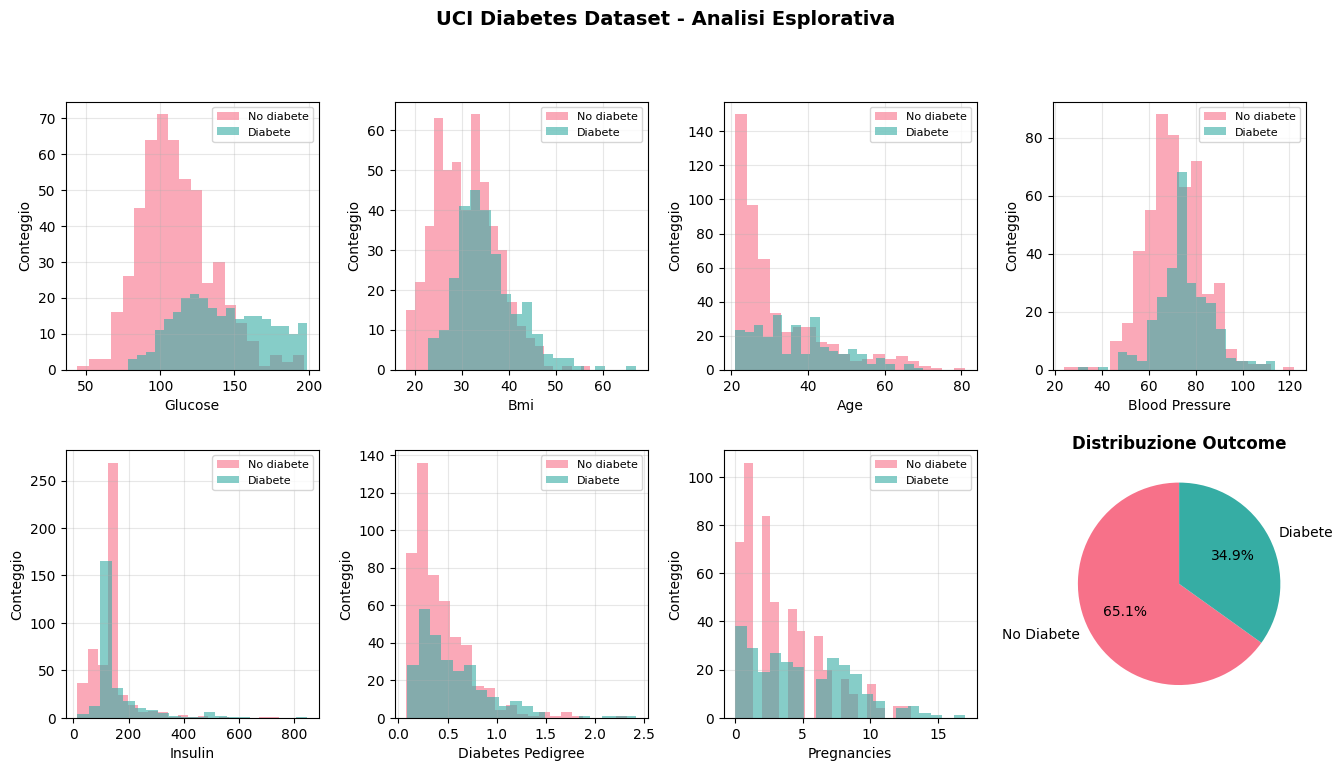


✓ Visualizzazione salvata: diabetes_analysis.png

SALVATAGGIO COMPLETATO
File: diabetes_dataset.csv | Dimensioni: 768x9 | Memoria: 54.1 KB

Generazione dataset sintetico - livello privacy: none


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/ctgan/synthesizers/_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(



SALVATAGGIO COMPLETATO
File: diabetes_synthetic_none.csv | Dimensioni: 768x9 | Memoria: 54.1 KB

Generazione dataset sintetico - livello privacy: moderate


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/ctgan/synthesizers/_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(



SALVATAGGIO COMPLETATO
File: diabetes_synthetic_moderate.csv | Dimensioni: 768x9 | Memoria: 54.1 KB

Generazione dataset sintetico - livello privacy: strong


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/ctgan/synthesizers/_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(



SALVATAGGIO COMPLETATO
File: diabetes_synthetic_strong.csv | Dimensioni: 768x9 | Memoria: 54.1 KB

✓ Pipeline completata. Dataset sintetici generati con privacy differenziale.


In [ ]:
# ============================================================================
# PROGETTO: Dati Sanitari Sintetici con Privacy Differenziale
# ============================================================================

!pip install -q ucimlrepo pandas numpy matplotlib seaborn sdv diffprivlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerie SDV
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Libreria privacy differenziale
from diffprivlib.mechanisms import Laplace

# ============================================================================
# 1. CARICAMENTO DATASET
# ============================================================================

def carica_dataset():
    try:
        from ucimlrepo import fetch_ucirepo
        diabetes = fetch_ucirepo(id=34)
        X = diabetes.data.features
        y = diabetes.data.targets
        df = pd.concat([X, y], axis=1)
        df.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                      'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
        print("Dataset caricato: UCI ML Repository")
    except:
        url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
        df = pd.read_csv(url, header=None)
        df.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                      'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
        print("Dataset caricato: fonte alternativa")
    return df


# ============================================================================
# 2. PREPROCESSING
# ============================================================================

def preprocessa_dataset(df):
    df_clean = df.copy()
    cols_missing = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
    for col in cols_missing:
        df_clean[col] = df_clean[col].replace(0, np.nan)
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    return df_clean


# ============================================================================
# 3. STATISTICHE E VISUALIZZAZIONE
# ============================================================================

def genera_tabella_statistica(df):
    stats = df.describe().T
    stats['missing'] = df.isnull().sum()
    stats = stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing']]

    print("\n" + "="*80)
    print("STATISTICHE DESCRITTIVE")
    print("="*80)
    print(f"Dimensioni: {df.shape[0]} osservazioni × {df.shape[1]} variabili")
    print(f"Distribuzione target:")
    print(f"  - Classe 0 (no diabete): {(df['outcome']==0).sum()} ({(df['outcome']==0).sum()/len(df)*100:.1f}%)")
    print(f"  - Classe 1 (diabete): {(df['outcome']==1).sum()} ({(df['outcome']==1).sum()/len(df)*100:.1f}%)")
    print(stats.round(2))
    return stats


def visualizza_dataset(df):
    fig = plt.figure(figsize=(16, 8))
    gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.3)
    color_palette = sns.color_palette("husl", 2)
    features_plot = ['glucose', 'bmi', 'age', 'blood_pressure', 'insulin', 'diabetes_pedigree', 'pregnancies']

    for i, feature in enumerate(features_plot):
        ax = fig.add_subplot(gs[i//4, i%4])
        df[df['outcome']==0][feature].hist(bins=20, alpha=0.6, color=color_palette[0], label='No diabete', ax=ax)
        df[df['outcome']==1][feature].hist(bins=20, alpha=0.6, color=color_palette[1], label='Diabete', ax=ax)
        ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
        ax.set_ylabel('Conteggio', fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(alpha=0.3)

    ax = fig.add_subplot(gs[1, 3])
    outcome_counts = df['outcome'].value_counts()
    ax.pie(outcome_counts, labels=['No Diabete', 'Diabete'], autopct='%1.1f%%', colors=color_palette, startangle=90, textprops={'fontsize': 10})
    ax.set_title('Distribuzione Outcome', fontsize=12, fontweight='bold')
    plt.suptitle('UCI Diabetes Dataset - Analisi Esplorativa', fontsize=14, fontweight='bold', y=0.995)
    plt.savefig('diabetes_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"\n✓ Visualizzazione salvata: diabetes_analysis.png")


def genera_tabella_campione(df, n=10):
    print("\n" + "="*80)
    print(f"CAMPIONE DATASET (prime {n} osservazioni)")
    print("="*80)
    print(df.head(n).to_string(index=True))


# ============================================================================
# 4. SALVATAGGIO
# ============================================================================

def salva_dataset(df, filename='diabetes_dataset.csv'):
    df.to_csv(filename, index=False)
    file_size = df.memory_usage(deep=True).sum() / 1024
    print("\n" + "="*80)
    print("SALVATAGGIO COMPLETATO")
    print("="*80)
    print(f"File: {filename} | Dimensioni: {df.shape[0]}x{df.shape[1]} | Memoria: {file_size:.1f} KB")
    return filename


# ============================================================================
# 5. PRIVACY DIFFERENZIALE: AGGIUNTA RUMORE LAPLA
# ============================================================================

def add_dp_noise(series, epsilon=1.0):
    sensitivity = series.max() - series.min()
    mech = Laplace(epsilon=epsilon, sensitivity=sensitivity)
    noisy = series.apply(lambda x: mech.randomise(x))
    return noisy


# ============================================================================
# 6. CORREZIONE VALORI USANDO LIMITE DEL DATASET REALE
# ============================================================================

def correggi_valori(df_synth, df_real):
    df_corr = df_synth.copy()

    # Colonne intere
    int_cols = ['age', 'pregnancies', 'outcome']
    for col in int_cols:
        vmin = df_real[col].min()
        vmax = df_real[col].max()
        df_corr[col] = df_corr[col].round().astype(int).clip(vmin, vmax)

    # Colonne continue
    cont_cols = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']
    for col in cont_cols:
        vmin = df_real[col].min()
        vmax = df_real[col].max()
        df_corr[col] = df_corr[col].clip(vmin, vmax)

    return df_corr


# ============================================================================
# 7. GENERAZIONE DATASET SINTETICO
# ============================================================================

def genera_dataset_sintetico(df_real, privacy_level='none'):
    print(f"\nGenerazione dataset sintetico - livello privacy: {privacy_level}")
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=df_real)
    ctgan = CTGANSynthesizer(metadata, epochs=300)
    ctgan.fit(df_real)
    df_synth = ctgan.sample(len(df_real))

    # Rumore DP
    if privacy_level == 'moderate':
        epsilon = 1.0
        for col in df_synth.select_dtypes(include=[np.number]).columns:
            df_synth[col] = add_dp_noise(df_synth[col], epsilon)
    elif privacy_level == 'strong':
        epsilon = 0.1
        for col in df_synth.select_dtypes(include=[np.number]).columns:
            df_synth[col] = add_dp_noise(df_synth[col], epsilon)

    # Correzione valori fuori range usando dataset reale
    df_synth = correggi_valori(df_synth, df_real)

    return df_synth


# ============================================================================
# 8. PIPELINE PRINCIPALE
# ============================================================================

def main():
    print("="*80)
    print("DATI SANITARI SINTETICI CON PRIVACY DIFFERENZIALE")
    print("="*80)

    df_raw = carica_dataset()
    df_clean = preprocessa_dataset(df_raw)
    genera_tabella_statistica(df_clean)
    genera_tabella_campione(df_clean)
    visualizza_dataset(df_clean)
    salva_dataset(df_clean, filename='diabetes_dataset.csv')

    # Generazione dataset sintetici
    privacy_levels = ['none', 'moderate', 'strong']
    sintetici = {}
    for level in privacy_levels:
        sintetici[level] = genera_dataset_sintetico(df_clean, privacy_level=level)
        salva_dataset(sintetici[level], filename=f'diabetes_synthetic_{level}.csv')

    print("\n✓ Pipeline completata. Dataset sintetici generati con privacy differenziale.")
    return df_clean, sintetici


# ============================================================================
# 9. ESECUZIONE
# ============================================================================

if __name__ == "__main__":
    df_diabetes, df_sintetici = main()


Il codice utilizza la libreria diffprivlib di IBM per garantire la privacy differenziale dei dati sintetici e si avvale di CTGAN di SDV per generare i dati stessi. In particolare, CTGAN è un modello generativo basato su reti neurali che apprende la distribuzione del dataset reale e produce dati sintetici che ne riproducono le caratteristiche statistiche. Per proteggere la privacy degli individui, il codice applica il meccanismo Laplace ai valori numerici dei dati sintetici, aggiungendo piccoli spostamenti casuali generati da una distribuzione centrata in zero. La quantità di rumore dipende dalla sensibilità della colonna, calcolata come la differenza tra il massimo e il minimo, e dal parametro epsilon, che misura quanto forte deve essere la privacy. Un epsilon piccolo produce rumore maggiore, rendendo i dati più “sfocati” e più sicuri, mentre un epsilon più grande riduce il rumore, lasciando i dati più simili all’originale. Nel codice, per il dataset sintetico a privacy moderata viene usato un epsilon di 1.0, mentre per una privacy forte viene impostato a 0.1. La funzione add_dp_noise applica il rumore ad ogni valore numerico usando questi parametri, spostando i valori in modo casuale ma controllato. In sostanza, la quantità di rumore aggiunta è proporzionale alla sensibilità divisa per epsilon, permettendo di bilanciare la fedeltà dei dati sintetici con la protezione della privacy individuale.


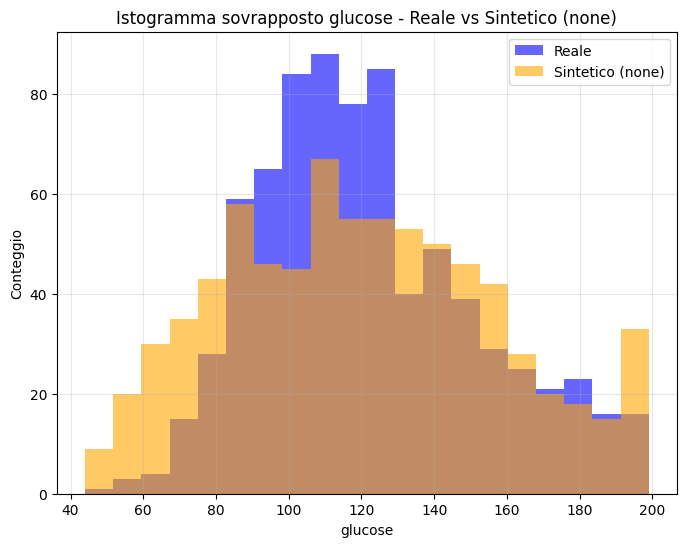

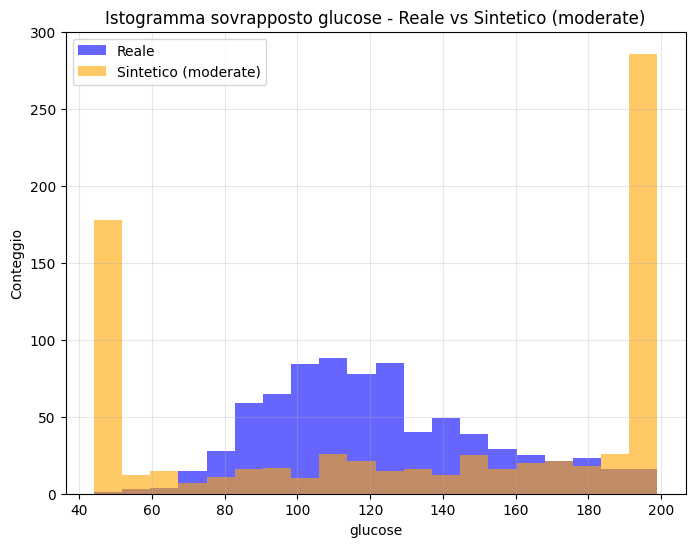

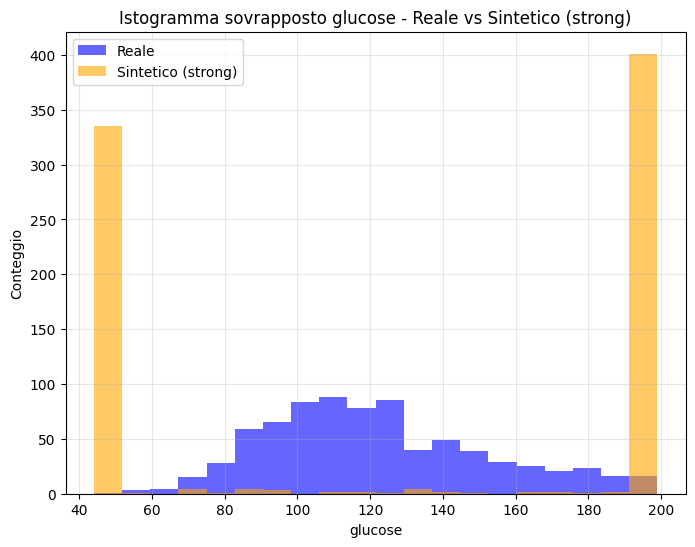

In [ ]:
# ============================================================================
# ISTOGRAMMA SOVRAPPPOSTO: Reale vs Sintetico (Conteggio)
# ============================================================================

import matplotlib.pyplot as plt

def istogramma_sovrapposto(df_real, df_synth, feature='glucose', privacy_level='none', bins=20):
    plt.figure(figsize=(8,6))
    plt.hist(df_real[feature], bins=bins, alpha=0.6, label='Reale', color='blue')  # rimosso density=True
    plt.hist(df_synth[feature], bins=bins, alpha=0.6, label=f'Sintetico ({privacy_level})', color='orange')  # rimosso density=True
    plt.xlabel(feature)
    plt.ylabel('Conteggio')
    plt.title(f'Istogramma sovrapposto {feature} - Reale vs Sintetico ({privacy_level})')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Esempio di utilizzo
istogramma_sovrapposto(df_diabetes, df_sintetici['none'], feature='glucose', privacy_level='none')
istogramma_sovrapposto(df_diabetes, df_sintetici['moderate'], feature='glucose', privacy_level='moderate')
istogramma_sovrapposto(df_diabetes, df_sintetici['strong'], feature='glucose', privacy_level='strong')
